## Імпорти

In [1]:
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [2]:
from constraint import Point, Sphere, Ellipsoid
from optimization import OptimizationProblem

## Розв'язок задачі умовного екстремуму

In [17]:
constr = Sphere(center=Point(x = 0, y = 0, z = 0), r = 1)

In [18]:
func = lambda x, y, z: x+y+z

In [5]:
opt_pr = OptimizationProblem(func, constr)

In [30]:
sol = opt_pr.solution(x_0 = Point(x = -100, y = 100, z = 15), 
                      eps = 0.00001, method = "divide",
                     file = "demo.txt")

In [20]:
vars(sol)

{'x': -0.5773502691896258, 'y': -0.5773502691896258, 'z': -0.5773502691896258}

In [31]:
trace = opt_pr.traceroute

In [32]:
len(trace)

15

In [33]:
trace

array([[-1.00000000e+02,  1.00000000e+02,  1.50000000e+01],
       [-7.10668703e-01,  6.96596055e-01,  9.85085330e-02],
       [-8.73982156e-01, -1.55009344e-01, -4.60572789e-01],
       [-7.09356988e-01, -4.37204776e-01, -5.52869466e-01],
       [-6.28420429e-01, -5.28367596e-01, -5.70890050e-01],
       [-5.96392735e-01, -5.59749383e-01, -5.75322808e-01],
       [-5.84366166e-01, -5.70952715e-01, -5.76653432e-01],
       [-5.79924364e-01, -5.75014649e-01, -5.77101278e-01],
       [-5.78293268e-01, -5.76496185e-01, -5.77259945e-01],
       [-5.77695540e-01, -5.77037762e-01, -5.77317317e-01],
       [-5.77476662e-01, -5.77235898e-01, -5.77338223e-01],
       [-5.77396534e-01, -5.77308408e-01, -5.77345862e-01],
       [-5.77367204e-01, -5.77334947e-01, -5.77348656e-01],
       [-5.77356468e-01, -5.77344661e-01, -5.77349679e-01],
       [-5.77352538e-01, -5.77348216e-01, -5.77350053e-01]])

## Візуалізація

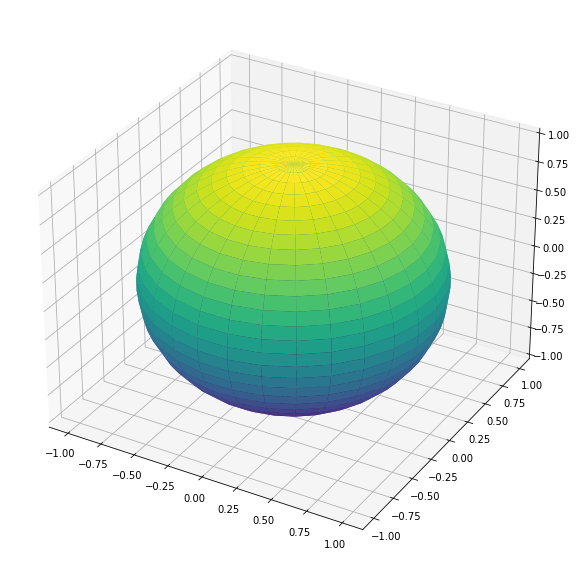

In [10]:
u = np.linspace(0, np.pi, 30)
v = np.linspace(0, 2 * np.pi, 30)

x = np.outer(np.sin(u), np.sin(v))
y = np.outer(np.sin(u), np.cos(v))
z = np.outer(np.cos(u), np.ones_like(v))


fig = plt.figure(figsize = (10, 20))
ax = plt.axes(projection='3d')

ax.plot_surface(x, y, z, cmap = plt.get_cmap("viridis"))
fig.savefig("1.png")

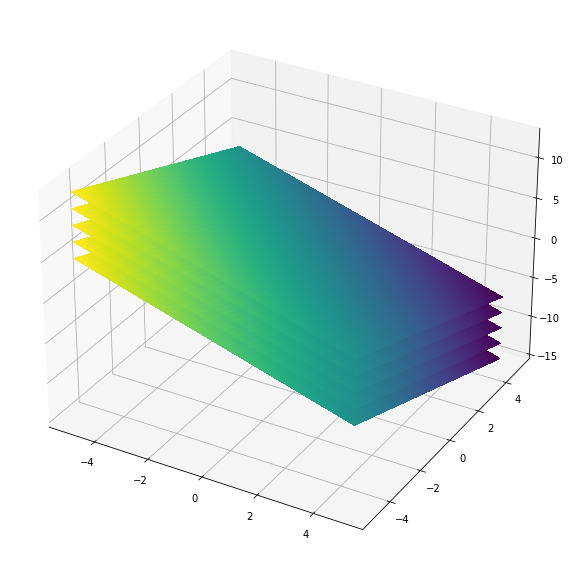

In [11]:
fig = plt.figure(figsize = (10, 20))
ax = plt.axes(projection='3d')
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
x, y = np.meshgrid(x, y)
for k in range(-5, 5, 2):
    z = k - x - y

    ax.plot_surface(x, y, z, cmap = plt.get_cmap("viridis"), antialiased=False)
    #ax.view_init(30, 30)
fig.savefig("2.png")

In [26]:
def plot_trace(trace, r = 1, rotate = None):
    u = np.linspace(0, np.pi, 30)
    v = np.linspace(0, 2 * np.pi, 30)

    x = r*np.outer(np.sin(u), np.sin(v))
    y = r*np.outer(np.sin(u), np.cos(v))
    z = r*np.outer(np.cos(u), np.ones_like(v))


    fig = plt.figure(figsize = (10, 20))
    ax = plt.axes(projection='3d')

    ax.plot_wireframe(x, y, z, cmap = plt.get_cmap("viridis"))
    ax.plot(trace.T[0], trace.T[1], trace.T[2], color = "red", marker = "o")
    if rotate is not None:
        ax.view_init(*rotate)
    #fig.savefig("3.png")

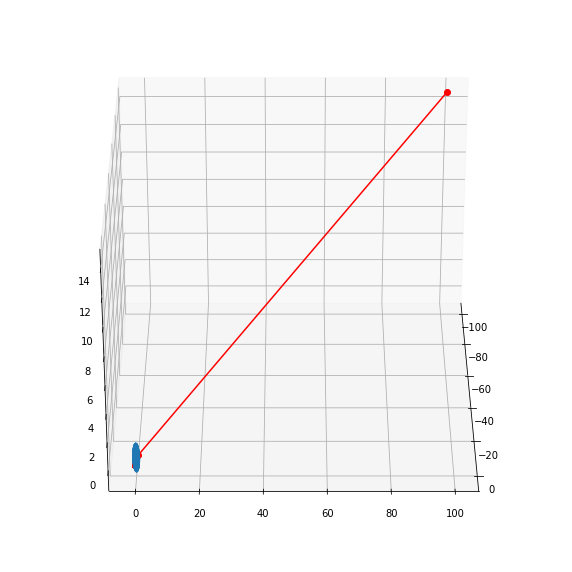

In [35]:
plot_trace(trace, rotate = (30, 0))

## Задача 9
Функція для мінімізації: $f(x, y, z) = x+4y+z$

Обмеження: $x^2 + 3y^2 + 2z^2 \leq 1$

In [3]:
ellipsoid = Ellipsoid(center = Point(x = 0, y = 0, z = 0),
                     r = 1,
                     a = np.array([1, 1/np.sqrt(3), 1/np.sqrt(2)]))

Заміна змінних і зведення до сфери:

Вводимо заміну для еліпсоїда: 

$\displaystyle \frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}+\frac{(z-z_0)^2}{c^2} \leq 1$

$\displaystyle \tilde{x} = \frac{x-x_0}{a}$

$\displaystyle \tilde{y} = \frac{y-y_0}{b}$

$\displaystyle \tilde{z} = \frac{z-z_0}{c}$

Тоді еліпсоїд у даних координатах перетворюється у сферу радіусом 1, а функція:

$\displaystyle f(x, y, z) = f(a\tilde{x}+x_0, b\tilde{y}+y_0, a\tilde{z}+z_0)$

In [4]:
@ellipsoid.coord_transform
def func(x, y, z):
    return x+4*y+z

In [5]:
opt_pr_9 = OptimizationProblem(func, ellipsoid)
sol = opt_pr_9.solution(x_0 = Point(x = 1, y = 1, z = 1), method = "divide")

In [6]:
print(func(*vars(sol).values()))

-2.6140644214513222


In [7]:
print(vars(ellipsoid.return_to_init_coords(sol)))

{'x_1': -0.38240189878693875, 'x_2': -0.510133494773075, 'x_3': -0.19112854357208317}


In [9]:
trace_9 = ellipsoid.trace_return_to_init_coords(opt_pr_9.traceroute)

## Візуалізація

In [10]:
def plot_ellipsoid(a, b, c, ax):
    u = np.linspace(0, np.pi, 100)
    v = np.linspace(0, 2 * np.pi, 100)

    x = a * np.outer(np.cos(u), np.sin(v))
    y = b * np.outer(np.sin(u), np.sin(v))
    z = c * np.outer(np.ones_like(u), np.cos(v))

    ax.plot_wireframe(x, y, z, cmap = plt.get_cmap("viridis"))

In [12]:
def plot_trace(a, b, c, trace, ax, rotate = None):
    
    plot_ellipsoid(a, b, c, ax)
    
    ax.plot(trace.T[0], trace.T[1], trace.T[2], color = "red", marker = "o")
    if rotate is not None:
        ax.view_init(*rotate)
    #fig.savefig("3.png")

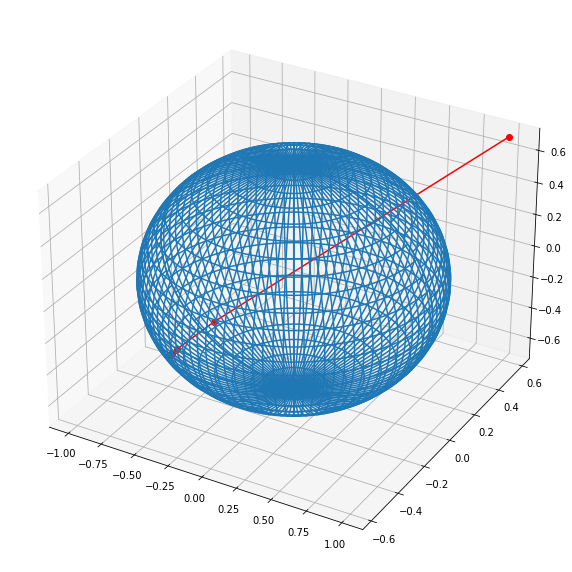

In [15]:
fig = plt.figure(figsize = (10, 20))
ax = plt.axes(projection='3d')
plot_trace(1, 1/np.sqrt(3), 1/np.sqrt(2), trace_9, ax)